# Evaluating a ML Model
![](https://media.giphy.com/media/mnwc6vn9T8dag/giphy.gif)<br>
###### Give this a read - https://scikit-learn.org/stable/modules/model_evaluation.html
<p>There are 3 different APIs for evaluating the quality of a model&rsquo;s predictions:</p>
<ul class="simple">
<li>
<p><strong>Estimator score method</strong>: Estimators have a&nbsp;<code class="docutils literal notranslate"><span class="pre">score</span></code>&nbsp;method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator&rsquo;s documentation.</p>
</li>
<li>
<p><strong>Scoring parameter</strong>: Model-evaluation tools using&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation"><span class="std std-ref">cross-validation</span></a>&nbsp;(such as&nbsp;<a class="reference internal" title="sklearn.model_selection.cross_val_score" href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">model_selection.cross_val_score</span></code></a>&nbsp;and&nbsp;<a class="reference internal" title="sklearn.model_selection.GridSearchCV" href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV"><code class="xref py py-class docutils literal notranslate"><span class="pre">model_selection.GridSearchCV</span></code></a>) rely on an internal&nbsp;<em>scoring</em>&nbsp;strategy. This is discussed in the section&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter"><span class="std std-ref">The scoring parameter: defining model evaluation rules</span></a>.</p>
</li>
<li>
<p><strong>Metric functions</strong>: The&nbsp;<code class="xref py py-mod docutils literal notranslate"><span class="pre">metrics</span></code>&nbsp;module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics"><span class="std std-ref">Classification metrics</span></a>,&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics"><span class="std std-ref">Multilabel ranking metrics</span></a>,&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics"><span class="std std-ref">Regression metrics</span></a>&nbsp;and&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics"><span class="std std-ref">Clustering metrics</span></a>.</p>
</li>
</ul>
<p>Finally,&nbsp;<a class="reference internal" href="https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators"><span class="std std-ref">Dummy estimators</span></a>&nbsp;are useful to get a baseline value of those metrics for random predictions.</p>

In [1]:
# standard imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
hd = pd.read_csv("https://raw.githubusercontent.com/ineelhere/Machine-Learning-and-Data-Science/master/scikit-learn/heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3 ways to evaluate sklearn models/estimators
* Estimator `score()` method.
* The `scoring` parameter.
* Problem specific metric functions.
<br><br>
![](https://media.giphy.com/media/OnlFONDq5Z56g/giphy.gif)

## a. Evaluating Classification Models

In [3]:
#get-set-go!

# import the ensemble classifiers
from sklearn.ensemble import RandomForestClassifier

# setup a random seed
np.random.seed(42)

# create the data
x = hd.drop("target", axis=1)
y = hd["target"]

# split into test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# fit the model to the data = training the ML model
clf = RandomForestClassifier() #isntantiate
clf.fit(x_train, y_train) #fit

# evaluate the above fitted RandomForestClassifier model = use the pattens the ML model has learnt above!
clf.score(x_test,y_test)

0.8524590163934426

#### The `score() method` (already done above though)

In [4]:
clf.score(x_train,y_train) #Return the mean accuracy on the given test data and labels.

1.0

In [5]:
clf.score(x_test,y_test) #Return the mean accuracy on the given test data and labels.

0.8524590163934426

Let us do the same, but now with regression

In [6]:
# import the ensemble regressors
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create the data
x = hd.drop("target", axis=1)
y = hd["target"]

# split into test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# fit the model to the data = training the ML model
model = RandomForestRegressor() #isntantiate
model.fit(x_train, y_train) #fit

# evaluate the above fitted RandomForestClassifier model = use the pattens the ML model has learnt above!
model.score(x_test,y_test)

0.5106393318965518

In [7]:
model.score(x_train,y_train) #Return the coefficient of determination R^2 of the prediction.

0.924203269641995

In [8]:
model.score(x_test,y_test) #Return the coefficient of determination R^2 of the prediction.

0.5106393318965518

See the difference?
* for classification - `score()` - Return the `mean accuracy` on the given test data and labels.
<br>
<pre>
In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.
</pre>
* for regression - `score()` - Return the `coefficient of determination` R^2 of the prediction.
<br>
<pre>The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.
</pre>

<br>
<br><strong>Yeah, you need to know the math!</strong><br>

![](https://media.giphy.com/media/bupsZiBKn7vAk/giphy.gif)
<br>
In case you want to learn these statistical and mathematical concepts, this resource would be very helpful (available for free)<br><br>

* MIT 18.650 Statistics for Applications, Fall 2016 - https://www.youtube.com/playlist?list=PLUl4u3cNGP60uVBMaoNERc6knT_MgPKS0
* MIT OCW - https://ocw.mit.edu/courses/mathematics/18-650-statistics-for-applications-fall-2016/

### The `scoring` parameter

In [9]:
#first things first
from sklearn.model_selection import cross_val_score

In [10]:
#now set up a classification model (already done above though)

# import the ensemble classifiers
from sklearn.ensemble import RandomForestClassifier

# setup a random seed
np.random.seed(42)

# create the data
x = hd.drop("target", axis=1)
y = hd["target"]

# split into test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# fit the model to the data = training the ML model
clf = RandomForestClassifier() #isntantiate
clf.fit(x_train, y_train) #fit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
##### Docstring: Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

##### Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like
    The data to fit. Can be for example a list, or an array.

y : array-like, optional, default: None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like, with shape (n_samples,), optional
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer callable object / function with signature
    ``scorer(estimator, X, y)`` which should return only
    a single value.

    Similar to :func:`cross_validate`
    but only a single metric is permitted.

    If None, the estimator's default scorer (if available) is used.

cv : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the default 5-fold cross validation,
    - integer, to specify the number of folds in a `(Stratified)KFold`,
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if the estimator is a classifier and ``y`` is
    either binary or multiclass, :class:`StratifiedKFold` is used. In all
    other cases, :class:`KFold` is used.

    Refer :ref:`User Guide <cross_validation>` for the various
    cross-validation strategies that can be used here.

    .. versionchanged:: 0.22
        ``cv`` default value if None changed from 3-fold to 5-fold.

n_jobs : int or None, optional (default=None)
    The number of CPUs to use to do the computation.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

verbose : integer, optional
    The verbosity level.

fit_params : dict, optional
    Parameters to pass to the fit method of the estimator.

pre_dispatch : int, or string, optional
    Controls the number of jobs that get dispatched during parallel
    execution. Reducing this number can be useful to avoid an
    explosion of memory consumption when more jobs get dispatched
    than CPUs can process. This parameter can be:

        - None, in which case all the jobs are immediately
          created and spawned. Use this for lightweight and
          fast-running jobs, to avoid delays due to on-demand
          spawning of the jobs

        - An int, giving the exact number of total jobs that are
          spawned

        - A string, giving an expression as a function of n_jobs,
          as in '2*n_jobs'

error_score : 'raise' or numeric
    Value to assign to the score if an error occurs in estimator fitting.
    If set to 'raise', the error is raised.
    If a numeric value is given, FitFailedWarning is raised. This parameter
    does not affect the refit step, which will always raise the error.

##### Returns
-------
scores : array of float, shape=(len(list(cv)),)
    Array of scores of the estimator for each run of the cross validation.

##### Examples
--------
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_score
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()
>>> print(cross_val_score(lasso, X, y, cv=3))
[0.33150734 0.08022311 0.03531764]

##### See Also
-------
:func:`sklearn.model_selection.cross_validate`:
    To run cross-validation on multiple metrics and also to return
    train scores, fit times and score times.

:func:`sklearn.model_selection.cross_val_predict`:
    Get predictions from each split of cross-validation for diagnostic
    purposes.

:func:`sklearn.metrics.make_scorer`:
Make a scorer from a performance metric or loss function.

Type:      function

![](https://media.giphy.com/media/etGPvG1Pqj9ks/giphy.gif)

* Cross Validation sklearn = https://scikit-learn.org/stable/modules/cross_validation.html

![](https://raw.githubusercontent.com/ineelhere/Machine-Learning-and-Data-Science/master/scikit-learn/scoring%20model%20via%20cross-validation.png)
Now see the code below.<br>
I can see that smile on your face!

In [12]:
cross_val_score(clf, x, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

* cv=5 means 5 fold splits (5 is default, you can change it as per requirement)
* So the above code made 5 different splits and gave 5 different scores.
* Now you can choose the ideal one - you can also take the average of the 5.

In [13]:
np.random.seed(42)

#single train and test split score
clf_single_score = clf.score(x_test, y_test)

#mean or average of 5 fold cross validation score
clf_cross_val = np.mean(cross_val_score(clf, x, y, cv=5))

#compare
clf_single_score, clf_cross_val

(0.8524590163934426, 0.8248087431693989)

* So, we see that the cross validation score is a little lower than the single score.
* But from the accuracy point of view, cross validation score is more accurate 

Now, the question is - Why is cross validation more accurate?

Answer - 
* In cross_val_score() method, the scoring parameter is set to NONE by default.
* If you notice above, the cross_val_score() method's scoring parameter says - " If None, the estimator's default scorer (if available) is used."
* This refers to the accuracy!

![](https://media.giphy.com/media/PqcIFm93VxA8o/giphy.gif)

Let's move on to the next strategy to evaluate a classification model <hr>

### Classification Model Evaluation Metrics functions
* Accuracy
* Area under ROC Curve
* Confusion Matrix
* Classification report

## Accuracy

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# setup a random seed
np.random.seed(42)

# create the data
x = hd.drop("target", axis=1)
y = hd["target"]

clf = RandomForestClassifier() #isntantiate

cvs = cross_val_score(clf,x,y,cv=5)

In [15]:
print(f"Heart Disease Classifier Cross Validated Accuracy : {np.mean(cvs) * 100 : .2f} %")

Heart Disease Classifier Cross Validated Accuracy :  82.48 %


We did this earlier! Isn't it? <br>
So, do not ever get overwhelmed with the new "terms" <br>
The answer often lies in the question itself :)

##### Remember - Higher accuracy `does not always` mean it is the best! 
![](https://media2.giphy.com/media/lSVRQe5PIpylx9Jjcg/giphy-downsized-medium.gif)
<hr>

## Area under the receiver operating characteristic curve
* Area under curve (AUC) - AUC measures the entire two-dimensional area underneath the entire ROC curve
* ROC curve - comparison of a model's true positive rate (tpr) v/s a model's false positive rate (fpr)

True positive means `model predicts 1 when truth is 1` <br>
False positive means `model predicts 1 when truth is 0` <br>
Truth negative means `model predicts 0 when truth is 0` <br>
False negative means `model predicts 0 when truth is 1`

An interesting article - https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [16]:
from sklearn.metrics import roc_curve

#create the split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#fit the classifier
clf.fit(x_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(x_test)    

In [17]:
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

 in the above output, column 0 is the negative class and column 1 is the positive class <br>
 so let us consider only the positive class

In [18]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

now we will calculate the fpr, tpr and threshold

<br>Note

Signature:
roc_curve(
    y_true,
    y_score,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
) <br>
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [20]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [21]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [22]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

Let's visualize the data - making more sense of the ROC curve <br>
![](https://media1.tenor.com/images/6a6e43e00cba294cb857617d9edb1e47/tenor.gif?itemid=8703853)

In [23]:
# create a function for plotting the curve
import matplotlib.pyplot as plt #already did this at the beginning though

def roc(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate(tpr)
    of the model.
    """
    #plot the curve!
    plt.plot(fpr, tpr, color="red", label = "ROC")
    
    #plot the baseline (line with no predictive power)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="just guessing!")
    
    #customize the plot
    plt.xlabel("False positive rate - fpr")
    plt.ylabel("True positive rate - tpr")
    plt.title("ROC (Receiver Operating Characteristic) Curve")
    plt.legend()
    plt.show()    

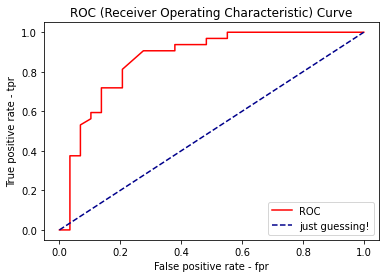

In [24]:
#moment of truth

roc(fpr, tpr)

![](https://thumbs.gfycat.com/MediocreThisGuppy-max-1mb.gif)
**Now let's have a look at the AUC (area under curve) score**

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**So, what has been the difference?**
**Let's see by plotting a perect curve and get a perfect score! - which is 1**

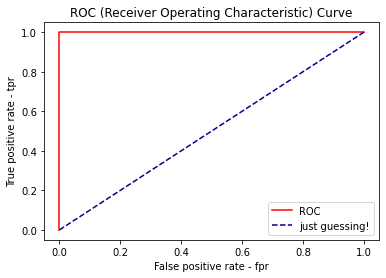

In [26]:
fpr_p, tpr_p, thresholds_p = roc_curve(y_test, y_test)

#the perfect roc curve
roc(fpr_p,tpr_p) #see? that's the best thing of functions!

In [27]:
#the perfect auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test)

1.0

**See the difference??**
![](https://thumbs.gfycat.com/TepidLinearCollie-small.gif)

#### For better understanding ---
* https://youtu.be/4jRBRDbJemM
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
* https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

## Confusion Matrix

quick way to compare the labels predicted by the model with the actual labels that were supposed to be predicted - thereby giving us an idea if thr model is geting confused.

In [28]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [29]:
# visualize the confusion matrix
pd.crosstab(y_test,
            y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


Now notice that the total number of labels in y_preds and the above crosstab is 61 (23+26+6+6)
<br>From the above crosstab we can see the false positives and true positives
![](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)

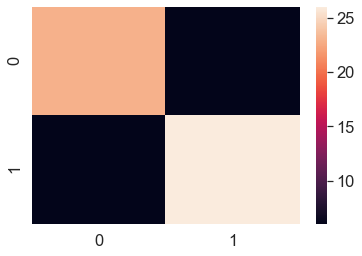

In [30]:
# one step further - make the visualization better with seaborn heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
cm = confusion_matrix(y_test,y_preds)

#plot it with seaborn
sns.heatmap(cm)

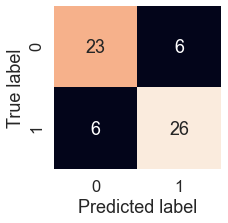

In [31]:
# let's improve the plot a bit

def plot_cm(cm):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(cm,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_cm(cm)

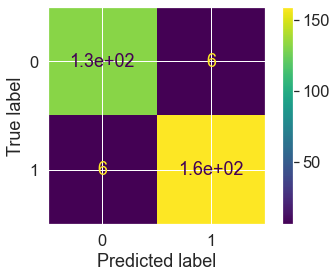

In [33]:
#alternative

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y)

**Now we are talking!   B-)**
![](https://i2.wp.com/media3.giphy.com/media/c35RMDO6luMaQ/giphy.gif)

## Classification report

* Reading - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
* Reading - https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

<p>The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are deeper in colour, e.g. have stronger classification metrics or that are more balanced.</p>
<p>The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. </p>

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* `Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
<br><br>
* `Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
<br><br>
* `F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
<br><br>
* `Support` - The number of samples each metric was calculated on.
<br><br>
* `Accuracy` - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
<br><br>
* `Macro avg` - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
<br><br>
* `Weighted avg` - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [39]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)

disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Here we have massive class imbalance! <br>
We got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0. <br>
So is the model useful? <br><br>
**Moral of the Story** - 
* It is good to make sure that we're using a wide spectrum of evaluation metrics for our classification models and not just accuracy. Also, `always refer to documentation when we are not sure about something.`

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

![](https://media3.giphy.com/media/1BhFiWpMigCnWnRMAG/giphy.gif)
<hr>

# b. Evaluating Regression Models

![](https://64.media.tumblr.com/7f3d98865041dba52a5438fa1851468e/tumblr_oxa225DmQN1toamj8o1_400.gifv)

![](https://media2.giphy.com/media/dAj9IBeCLaGmRlSkju/giphy.gif)

![](https://i.imgur.com/fPVyfoI.gif)